# Using APIs with Python

This Ipython notebook shows you how to use the World Bank API with the Python requests library. At the end there is a short exercise for you.

To access APIs in Python, you can use the [requests library](http://docs.python-requests.org/en/master/user/install/). 

To install, you can go in a terminal and type:
```
pip install pipenv
pipenv install requests
```

When you use the requests library, it's like putting an API url in a browser except now Python does this behind the scenes programatically and then stores the results in a variable. The classroom workspaces already have the requests library installed. Here is a demonstration of how the request library works.

In [4]:
# Basic request: Brazil GDP
import requests
r = requests.get('http://api.worldbank.org/v2/countries/br/indicators/NY.GDP.MKTP.CD')
r.text # XML text by default

# With requests we can perform the typical HTTP request methods:
# - GET: request a representation of the specified resource.
# - HEAD: response identical to a GET request, but without the response body.
# - POST: submits an entity to the specified resource, often causing a change in state.
# - PUT: replaces all current representations of the target resource with the request payload.
# - DELETE: delete the specified resource.
# - CONNECT: establish a tunnel to the server identified by the target resource.
# - OPTIONS: describe the communication options for the target resource.
# - TRACE: perform a message loop-back test along the path to the target resource.
# - PATCH: apply partial modifications to a resource.
#
# With the World Bank API, we can only perform GET methods


'ï»¿<?xml version="1.0" encoding="utf-8"?>\r\n<wb:data page="1" pages="2" per_page="50" total="62" sourceid="2" sourcename="World Development Indicators" lastupdated="2022-07-20" xmlns:wb="http://www.worldbank.org">\r\n  <wb:data>\r\n    <wb:indicator id="NY.GDP.MKTP.CD">GDP (current US$)</wb:indicator>\r\n    <wb:country id="BR">Brazil</wb:country>\r\n    <wb:countryiso3code>BRA</wb:countryiso3code>\r\n    <wb:date>2021</wb:date>\r\n    <wb:value>1608981220812.2</wb:value>\r\n    <wb:unit />\r\n    <wb:obs_status />\r\n    <wb:decimal>0</wb:decimal>\r\n  </wb:data>\r\n  <wb:data>\r\n    <wb:indicator id="NY.GDP.MKTP.CD">GDP (current US$)</wb:indicator>\r\n    <wb:country id="BR">Brazil</wb:country>\r\n    <wb:countryiso3code>BRA</wb:countryiso3code>\r\n    <wb:date>2020</wb:date>\r\n    <wb:value>1448565936739.56</wb:value>\r\n    <wb:unit />\r\n    <wb:obs_status />\r\n    <wb:decimal>0</wb:decimal>\r\n  </wb:data>\r\n  <wb:data>\r\n    <wb:indicator id="NY.GDP.MKTP.CD">GDP (current 

# Explanation of Results 

```
import requests
```

This line imports the requests library.

```
r = requests.get('http://api.worldbank.org/v2/countries/br/indicators/NY.GDP.MKTP.CD')
```

The line `requests.get` sends out a "get" request to the url specified in parenthesis. The html standard specifies different types of [request methods](https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods) with the most common one being "get". A "get" request is generally reserved for obtaining data from a server. For the World Bank API, you'll only need to make "get" requests. An API's documentation will generally tell you what type of requests to make.

The last line of code outputs the results.
```
r.text
``` 

In this case, the output is xml data. [XML](https://www.w3schools.com/xml/xml_whatis.asp) is a language for storing and transmitting data. XML was standardized in the late 1990s. A few years later, the JSON format came along and serves a similar purpose. JSON tends to be much easier to work with and luckily, the World Bank API can return data in json format by specifying the format parameters. 

Next, you'll see how to send parameters with your get request.

# Sending Parameters with the Get Request

This url, `http://api.worldbank.org/v2/countries/br/indicators/NY.GDP.MKTP.CD`, obtains GDP data for Brazil. You specify the country name with the [2-character ISO code](http://www.nationsonline.org/oneworld/country_code_list.htm) and then specify the economic indicator that you want, which in this case is `NY.GDP.MKTP.CD`. 

To see all of the possible indicators, visit the [world bank indicator dashboard](https://data.worldbank.org/indicator?tab=all) or use the API address `http://api.worldbank.org/v2/indicators`.

The url syntax is specific to the World Bank API. Other APIs might be different.

When making a get request, you can add parameters to the end of the url with the following syntax:
`http://api.worldbank.org/v2/countries/br/indicators/NY.GDP.MKTP.CD?format=json&per_page=500&date=1990:2015`

where a question mark was added at the end of the url following by each parameter name and parameter values. The parameters are separated by the ampersand & sign. Adding parameters to a get request with the question mark ? and ampersand is the standard way for adding parameters to a get request.

With the requests library, you can send this get request in one of two ways. The first way specifies the entire url in a single string.

```
r = requests.get('http://api.worldbank.org/v2/countries/br/indicators/NY.GDP.MKTP.CD?format=json&per_page=500&date=1990:2015')

```

The second way separate the base url and the parameters.

```
payload = {'format': 'json', 'per_page': '500', 'date':'1990:2015'}
r = requests.get('http://api.worldbank.org/v2/countries/br/indicators/NY.GDP.MKTP.CD', params=payload)
```

Why use the second version? It's somewhat easier to write programs with the second version because you can easily change the values in the payload dictionary whereas the first version involves manipulating the url string.

Run the code cell below to show that both versions give the same results.

In [8]:
# Request with parameters integrated in the URL:
# First parameter separated with ?, next with &
r_url = requests.get('http://api.worldbank.org/v2/countries/br/indicators/NY.GDP.MKTP.CD?format=json&per_page=500&date=1990:2015')

# Request with parameters in payload dictionary passed as params argument
payload = {'format': 'json', 'per_page': '500', 'date':'1990:2015'}
r_payload = requests.get('http://api.worldbank.org/v2/countries/br/indicators/NY.GDP.MKTP.CD', params=payload)

# Test if both results are the same string
r_url.text == r_payload.text # True

True

# Navigating the JSON response

Once you have the data, what can you do with it? The requests library comes with a json decoder. In order to obtain the json response, all you have to do is use the .json() method like so:

```
payload = {'format': 'json', 'per_page': '500', 'date':'1990:2015'}
r = requests.get('http://api.worldbank.org/v2/countries/br/indicators/NY.GDP.MKTP.CD', params=payload)
r.json()
```

Run the cell below to see the results:

In [13]:
# Requests comes with a JSON decoder which is very simple to use: just .json()
payload = {'format': 'json', 'per_page': '500', 'date':'1990:2015'}
r = requests.get('http://api.worldbank.org/v2/countries/br/indicators/NY.GDP.MKTP.CD', params=payload)
r.json()
# Every API delivers the results in their ways; output the result and decide what we need
# The WB delivers a list with two items: metadata and the data
# So we take the second item, which is a list of all the time series of GDP for Brazil

[{'page': 1,
  'pages': 1,
  'per_page': 500,
  'total': 26,
  'sourceid': '2',
  'sourcename': 'World Development Indicators',
  'lastupdated': '2022-07-20'},
 [{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2015',
   'value': 1802211999538.68,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2014',
   'value': 2456043766028.73,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2013',
   'value': 2472819362216.69,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
   'country': {

The result is a list of json values, which you can iterate through to access all of the data. Every API will return data in a slightly different way, so you need to look at the data and figure out how to clean the data for your purposes. For example, in the json response, the first entry contains meta data about the results. The second entry is a list containing all of the data points. For the purposes of analyzing the data, you only need the second entry, which you can access with `r.json()[1]`. Run the code cells below to see an example of how to iterate through the data, clean the data, and then plot the results.

In [19]:
# Get the World Bank GDP data for Brazil, China and the United States
payload = {'format': 'json', 'per_page': '500', 'date':'1990:2016'}
r = requests.get('http://api.worldbank.org/v2/countries/br;cn;us/indicators/NY.GDP.MKTP.CD', params=payload)

# Put the results in a dictionary where each country contains a list of all the x values and all the y values
# This will make it easier to plot the results
from collections import defaultdict
data = defaultdict(list)

for entry in r.json()[1]:
    # Check if country is already in dictionary.
    # If so, append the new x and y values to the lists
    if data[entry['country']['value']]:
        data[entry['country']['value']][0].append(int(entry['date']))
        data[entry['country']['value']][1].append(float(entry['value']))       
    else: # if country not in dictionary, then initialize the lists that will hold the x and y values
        data[entry['country']['value']] = [[],[]] # keys are countries; values are two lists of dates and GDP values

# show the results contained in the data dictionary
for country in data: # keys are countries
    print(country)
    print(data[country][0]) # dates
    print(data[country][1]) # gdp
    print('\n')

Brazil
[2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990]
[1802211999538.68, 2456043766028.73, 2472819362216.69, 2465228293894.01, 2616156606666.62, 2208838108577.09, 1666996294372.87, 1695855391810.9, 1397114247331.17, 1107626711406.63, 891633826603.377, 669289321944.516, 558233724164.711, 509795270685.19, 559983704094.17, 655448188259.351, 599642075004.471, 863711007325.493, 883206452795.124, 850426433004.077, 769333330368.987, 525369851353.742, 368295777770.079, 328187944300.908, 342609227209.645, 390725626002.866]


China
[2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990]
[11061553079871.5, 10475682920597.7, 9570406235659.64, 8532229986993.65, 7551500124197.17, 6087163874510.73, 5101703073088.97, 4594307032667.98, 3550342737009.53, 2752131773358.92, 2285965892364.2, 1955347

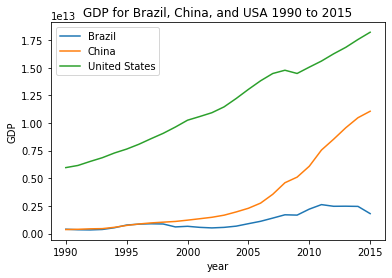

In [15]:
# visualize the results with matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

# create a plot for each country
for country in data:
    plt.plot(data[country][0], data[country][1], label=country)

# label the plot
plt.title('GDP for Brazil, China, and USA 1990 to 2015')
plt.legend()
plt.xlabel('year')
plt.ylabel('GDP')
plt.show()

# Practice

Here is a practice exercise for you to try out. Go to the World Bank data website found [here](https://data.worldbank.org/indicator) and find the `Population growth (annual %)` indicator. If you click on the indicator link, you'll see the indicator symbol in the web URL (hint it starts with "SP").

Use the requests library to find the indicator values for China and India in the years 2013, 2014 and 2015. Put the results in a dictionary in this format:
{country_name: [[2013, 2014, 2015], [value_2013, value_2014, value_2015]]}


In [17]:
# TODO: assign parameters to a dictionary called payload.
# Use the format parameter so that the request 
# returns data in the json format. 
# Use the date parameter to filter for the necessary years

payload = {'format': 'json', 'per_page': '500', 'date':'2013:2016'}

# TODO: write the request and put the results in the r variable
r = requests.get('http://api.worldbank.org/v2/countries/in;cn/indicators/SP.POP.GROW', params=payload)

# TODO: store the results in a dictionary like in the previous example.
# where each the dictionary keys are a country and the dictionary
# values are lists of lists with the dates in one list and the values
# in another list.

# clean the data and put it in a dictionary
data = defaultdict(list)
for entry in r.json()[1]:
    # check if country is already in dictionary. If so, append the new x and y values to the lists
    if data[entry['country']['value']]:
        data[entry['country']['value']][0].append(int(entry['date']))
        data[entry['country']['value']][1].append(float(entry['value']))       
    else: # if country not in dictionary, then initialize the lists that will hold the x and y values
        data[entry['country']['value']] = [[],[]] 

In [18]:
data

defaultdict(list,
            {'China': [[2015, 2014, 2013],
              [0.581456146657648, 0.630326389541893, 0.666072977690069]],
             'India': [[2015, 2014, 2013],
              [1.11689591278599, 1.14567340150608, 1.18290421490412]]})

If you did it correctly, you should get a dictionary with the following values:

```
{'China': [[2015, 2014, 2013],
[0.508136747291937, 0.506311591779847, 0.49370963351136]],
'India': [[2015, 2014, 2013],
[1.16752707459156, 1.18932821143382, 1.21941894433091]]})
```

For a solution, go to the file menu in the workspace, click open, and choose the 'api_solution.py' file.

# Authentication

The World Bank API does not require authentication; however, many API do require some sort of user authentication with a username and password that you need to send along with your request. The requests documentation gives the [basics of how to use authentication](http://docs.python-requests.org/en/master/user/authentication/) when sending a request.

The Twitter API, for example, requires you to set up credentials. 
But before you get bogged down by the Twitter API documentation and authentication protocols, you might want to do an internet search for Python twitter libraries. Oftentimes, for the APIs of the big internet companies, someone has [built a library](https://developer.twitter.com/en/docs/developer-utilities/twitter-libraries.html) that makes it much easier to use the API.